## 1. Encàrrec de productora
<p><img src="https://cdn.pixabay.com/photo/2018/10/09/00/21/netflix-3733812_960_720.jpg" alt="foto pelicula"></p>
<p>Una de les productores més importants del mercat ens ha demant fer un anàlisis històric abans d'invertir en una nova pel·lìcula.</p>
<p>Haurem de donar repsposta a diferents preguntes com: </p>

*   La popularitat de les pel·lícules han disminuït durant els anys
*   Quins gènere tenen millor valoracions
*   Les pel·lícules que ofereixen un millor benefici proporcional son les de més pressupost
*   Quins gèneres ofereixen més benefici.
*   Proposa una idea de pel·lìcula
*   Surt a compte fer una segona part?

<p>Per realitzar aquest anàlisis disposem dels següents set de dades:.</p>

*  movies.p: pel·lìcula data i espectadors
*   movie_to_genres.p: gènere de cada pel·lìcula
*   financial.p: dades econòmiques de cada pel·lìcula
*   sequels.p: relació de les pelìcules i les seves sequeles.
*   ratings.p: valoració de les pel·lìcules






---



## Anàlisis de la popularitat

L'empresa creu que durant els darrers anys les pel·lícules tenen menys popularitat. Vol que ho comprovem gràficament

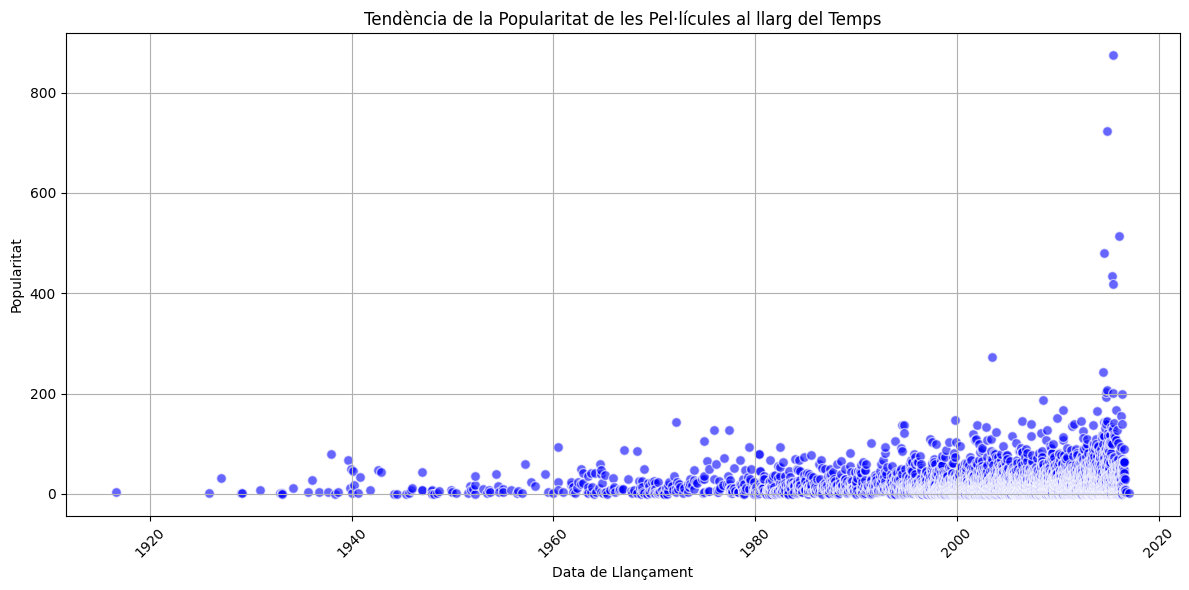

In [52]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

with open('DATABASE/movies.p', 'rb') as file:
    movies_data = pickle.load(file)

movies_df = pd.DataFrame(movies_data)

movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')
movies_df = movies_df.dropna(subset=['release_date', 'popularity'])
movies_df = movies_df.sort_values(by='release_date')

plt.figure(figsize=(12, 6))
plt.scatter(movies_df['release_date'], movies_df['popularity'], alpha=0.6, color='blue', edgecolors='w', s=50)
plt.title('Tendència de la Popularitat de les Pel·lícules al llarg del Temps')
plt.xlabel('Data de Llançament')
plt.ylabel('Popularitat')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Primer de tot importarem el nostre dataset i analitzarem les seves dades bàsiques ¿Quina es la popularitat mitja i la més alta?

In [51]:
import pickle
import pandas as pd

with open('DATABASE/movies.p', 'rb') as file:
    movies_data = pickle.load(file)

movies_df = pd.DataFrame(movies_data)

popularitat_mitjana = movies_df['popularity'].mean()
popularitat_maxima = movies_df['popularity'].max()

print(f"La popularitat mitjana és: {popularitat_mitjana}")
print(f"La popularitat més alta és: {popularitat_maxima}")


La popularitat mitjana és: 21.492300588174057
La popularitat més alta és: 875.581305


Necessitem treballar amb el camp release_date com a datatime, així que transformem la columna i ho comprovem. ¿De quin fins a quin any tenim dades?

In [50]:
import pickle
import pandas as pd

with open('DATABASE/movies.p', 'rb') as file:
    movies_data = pickle.load(file)

movies_df = pd.DataFrame(movies_data)

movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

data_inici = movies_df['release_date'].min()
data_fi = movies_df['release_date'].max()

print(f"Tenim dades des de l'any {data_inici.year} fins a l'any {data_fi.year}.")


Tenim dades des de l'any 1916 fins a l'any 2017.


L'empresa considera que els gustos han canviat molt durant els últims anys, aixi que nomès l'interessen les dades desde el 2010. ¿De cuàntes dades disposem? ¿De cuàntes dades disposem?

In [49]:
import pickle
import pandas as pd

with open('DATABASE/movies.p', 'rb') as file:
    movies_data = pickle.load(file)

movies_df = pd.DataFrame(movies_data)

movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

movies_2010_df = movies_df[movies_df['release_date'].dt.year >= 2010]

num_dades = len(movies_2010_df)

print(f"Disposem de {num_dades} pel·lícules des de l'any 2010.")


Disposem de 1446 pel·lícules des de l'any 2010.


Pasem a mostrar la linea temporal de com ha variat la popularitat durant els darrers anys.

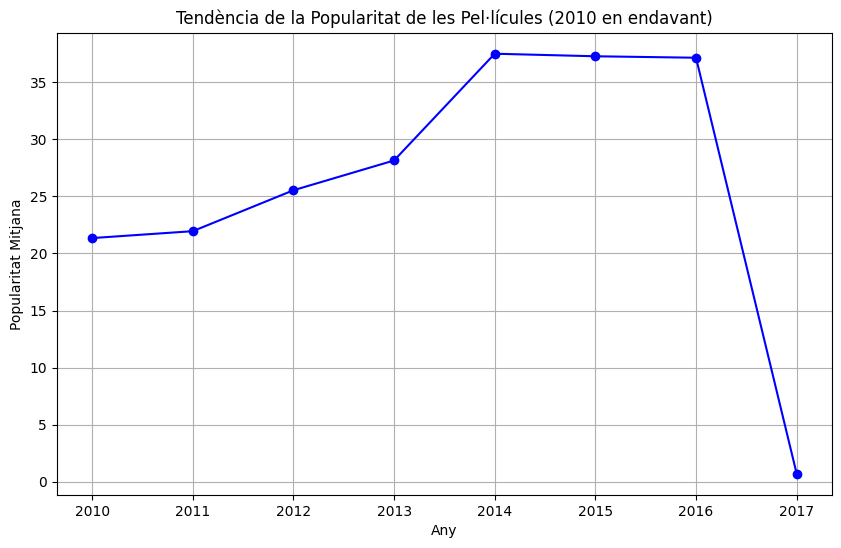

In [48]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

with open('DATABASE/movies.p', 'rb') as file:
    movies_data = pickle.load(file)

movies_df = pd.DataFrame(movies_data)

movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

movies_2010_df = movies_df[movies_df['release_date'].dt.year >= 2010]

popularitat_any = movies_2010_df.groupby(movies_2010_df['release_date'].dt.year)['popularity'].mean()

plt.figure(figsize=(10, 6))
plt.plot(popularitat_any.index, popularitat_any.values, marker='o', color='b', linestyle='-')
plt.title('Tendència de la Popularitat de les Pel·lícules (2010 en endavant)')
plt.xlabel('Any')
plt.ylabel('Popularitat Mitjana')
plt.grid(True)
plt.xticks(popularitat_any.index)
plt.show()


¿Què passa al 2017, quin és el motiu? Igualment aquesta devadalla és molt extranya, és probalble a que en alguns anys s'hagin realitzat moltes més pel·lícules i que per aquesta raó la mitja sigui molt més alta. Anem a fer el mateix procediment amb la mitja

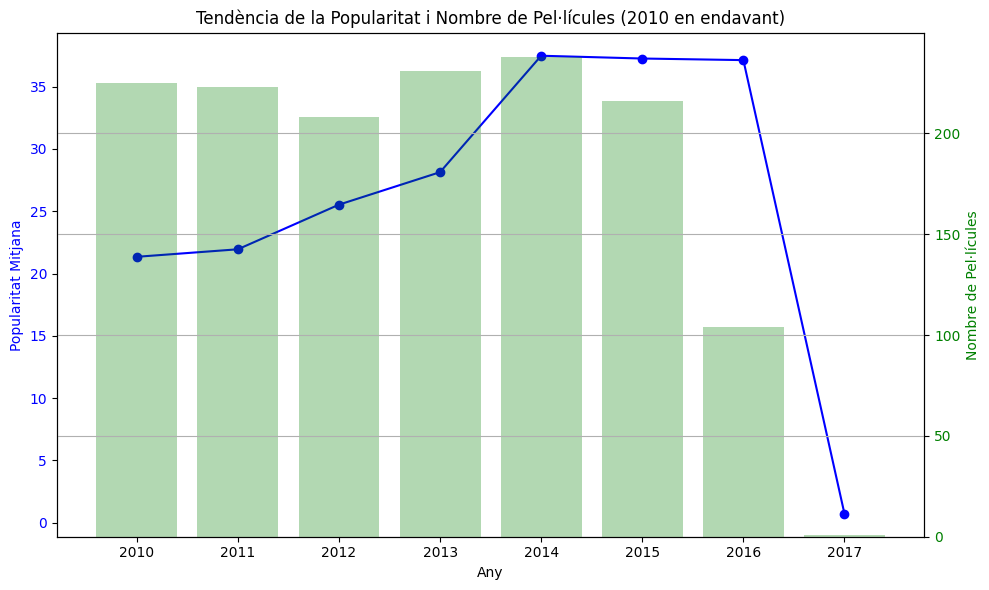

In [47]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

with open('DATABASE/movies.p', 'rb') as file:
    movies_data = pickle.load(file)

movies_df = pd.DataFrame(movies_data)

movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

movies_2010_df = movies_df[movies_df['release_date'].dt.year >= 2010]

popularitat_any = movies_2010_df.groupby(movies_2010_df['release_date'].dt.year)['popularity'].mean()
nombre_pellicules_any = movies_2010_df.groupby(movies_2010_df['release_date'].dt.year)['id'].count()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Any')
ax1.set_ylabel('Popularitat Mitjana', color='b')
ax1.plot(popularitat_any.index, popularitat_any.values, marker='o', color='b', linestyle='-', label='Popularitat Mitjana')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()  
ax2.set_ylabel('Nombre de Pel·lícules', color='g')  
ax2.bar(nombre_pellicules_any.index, nombre_pellicules_any.values, alpha=0.3, color='g', label='Nombre de Pel·lícules')  
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Tendència de la Popularitat i Nombre de Pel·lícules (2010 en endavant)')
fig.tight_layout()  
plt.grid(True)
plt.show()


### Resposta 1. Estan perdent popularitat les pel·lìcules?

In [ ]:
#El gràfic mostra una tendència de disminució de la popularitat de les pel·lícules el 2017. 
#Una possible explicació podria ser la manca de registres o dades per a aquest any específic. 



---



## Anàlisis del rating

Un cop decidit que val la pena realitzar una pel·lìcula, haurem de valorar de quina gènere val la pena en funció de la seva valoració. Primer de tot mostrarem la puntuació mitja de les pel·lícules i les 10 pel·lìcules més valorades. Mostra únicament el nom i el títol de la pel·lìcula ( i el index que surt per defecte)

In [46]:
import pickle
import pandas as pd

with open('DATABASE/movies.p', 'rb') as file:
    movies_data = pickle.load(file)

movies_df = pd.DataFrame(movies_data)

with open('DATABASE/ratings.p', 'rb') as file:
    ratings_data = pickle.load(file)

ratings_df = pd.DataFrame(ratings_data)

merged_df = pd.merge(movies_df, ratings_df, on='id', how='inner')

top_10_pellicules = merged_df.nlargest(10, 'vote_average')[['id', 'title', 'vote_average']]

print("\nLes 10 pel·lícules més valorades:")
print(top_10_pellicules.reset_index(drop=True))



Les 10 pel·lícules més valorades:
       id                     title  vote_average
0   40963            Little Big Top          10.0
1   89861          Stiff Upper Lips          10.0
2   78373     Dancer, Texas Pop. 81          10.0
3  361505     Me You and Five Bucks          10.0
4  346081                 Sardaarji           9.5
5   69848            One Man's Hero           9.3
6     278  The Shawshank Redemption           8.5
7   88641        There Goes My Baby           8.5
8     238             The Godfather           8.4
9   43867     The Prisoner of Zenda           8.4


De les pel·lìcules que ens interessa pel nostre anàlisis ( més de 60k de popularitat i més de 2000 valoracions) obtindrem el seu gènere per mostra gràficament la mitja per gènere.

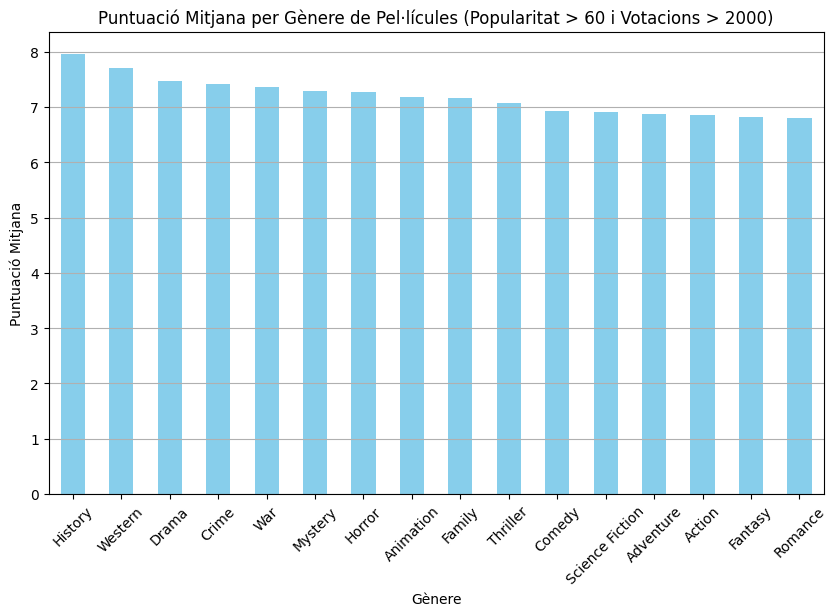

In [57]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

with open('DATABASE/movies.p', 'rb') as file:
    movies_data = pickle.load(file)

movies_df = pd.DataFrame(movies_data)

with open('DATABASE/ratings.p', 'rb') as file:
    ratings_data = pickle.load(file)

ratings_df = pd.DataFrame(ratings_data)

with open('DATABASE/movie_to_genres.p', 'rb') as file:
    genres_data = pickle.load(file)

genres_df = pd.DataFrame(genres_data)

merged_df = pd.merge(movies_df, ratings_df, on='id', how='inner')
final_df = pd.merge(merged_df, genres_df, left_on='id', right_on='movie_id', how='inner')

filtered_df = final_df[(final_df['popularity'] > 60) & (final_df['vote_count'] > 2000)]

if not filtered_df.empty:
    puntuacio_mitjana_per_genero = filtered_df.groupby('genre')['vote_average'].mean().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    puntuacio_mitjana_per_genero.plot(kind='bar', color='skyblue')
    plt.title('Puntuació Mitjana per Gènere de Pel·lícules (Popularitat > 60 i Votacions > 2000)')
    plt.xlabel('Gènere')
    plt.ylabel('Puntuació Mitjana')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()


¿Quin és el motiu que els tamany dels dataset siguin diferents?

¿Quins son el tres gèneres amb millor valoració?

In [44]:
import pickle
import pandas as pd

with open('DATABASE/ratings.p', 'rb') as file:
    ratings_data = pickle.load(file)

with open('DATABASE/movie_to_genres.p', 'rb') as file:
    genres_data = pickle.load(file)

ratings_df = pd.DataFrame(ratings_data)
genres_df = pd.DataFrame(genres_data)

merged_df = pd.merge(genres_df, ratings_df, left_on='movie_id', right_on='id')

puntuacio_mitjana_per_genero = merged_df.groupby('genre')['vote_average'].mean().sort_values(ascending=False)

top_3_generes = puntuacio_mitjana_per_genero.head(3)

print("Els tres gèneres amb millor valoració són:")
print(top_3_generes)


Els tres gèneres amb millor valoració són:
genre
History    6.719797
War        6.713889
Drama      6.388594
Name: vote_average, dtype: float64




---



## Anàlisis econòmic

Observa el dataset financial i els seus estadìstics bàsics. ¿Quin és el pressupost i els ingressos promig?¿Sembla rentable fer una pel·lìcula?

In [43]:
import pickle
import pandas as pd

with open('DATABASE/financials.p', 'rb') as file:
    financials_data = pickle.load(file)

financials_df = pd.DataFrame(financials_data)

estadistiques = financials_df[['budget', 'revenue']].describe()

pressupost_mitja = financials_df['budget'].mean()
ingressos_mitjos = financials_df['revenue'].mean()

print("Estadístiques bàsiques del pressupost i ingressos:")
print(estadistiques)

print(f"\nPressupost mitjà: {pressupost_mitja:.2f}")
print(f"Ingressos mitjos: {ingressos_mitjos:.2f}")

if ingressos_mitjos > pressupost_mitja:
    print("Sembla rentable fer una pel·lícula.")
else:
    print("No sembla rentable fer una pel·lícula.")


Estadístiques bàsiques del pressupost i ingressos:
             budget       revenue
count  3.229000e+03  3.229000e+03
mean   4.065444e+07  1.212430e+08
std    4.439674e+07  1.863029e+08
min    1.000000e+00  5.000000e+00
25%    1.050000e+07  1.700000e+07
50%    2.500000e+07  5.518472e+07
75%    5.500000e+07  1.462920e+08
max    3.800000e+08  2.787965e+09

Pressupost mitjà: 40654444.77
Ingressos mitjos: 121242957.26
Sembla rentable fer una pel·lícula.


Mostra la distribució (histograma) del pressupost de les pel·lícules. ¿La majoria de pel·lìcules son de baix o alt pressupost?

<Axes: >

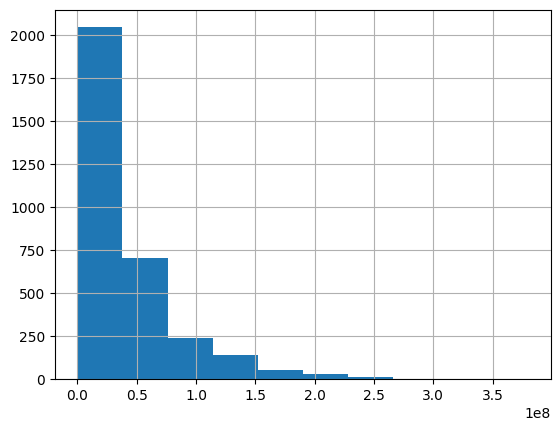

In [66]:
financials_df = pd.read_pickle('DATABASE/financials.p')
financials_df['budget'].hist()


Más de la mitad de peliculas tienen un presupuesto entre 0 y 50 millones.

In [ ]:
#Si

Volem mostrar ( nom inclòs) les pel·lìcules les 5 pel·lícules mès profitosses i les 5 més deficitàries de la historia.

In [41]:
import pickle
import pandas as pd

with open('DATABASE/financials.p', 'rb') as file:
    financials_data = pickle.load(file)

with open('DATABASE/movies.p', 'rb') as file:
    movies_data = pickle.load(file)

financials_df = pd.DataFrame(financials_data)
movies_df = pd.DataFrame(movies_data)

merged_df = pd.merge(financials_df, movies_df, on='id')
merged_df['profit'] = merged_df['revenue'] - merged_df['budget']

pelicules_mas_profitosses = merged_df.nlargest(5, 'profit')[['title', 'profit']]
pelicules_mas_deficitaries = merged_df.nsmallest(5, 'profit')[['title', 'profit']]

print("Les 5 pel·lícules més profitosses:")
print(pelicules_mas_profitosses)

print("\nLes 5 pel·lícules més deficitàries:")
print(pelicules_mas_deficitaries)


Les 5 pel·lícules més profitosses:
             title        profit
0           Avatar  2.550965e+09
25         Titanic  1.645034e+09
28  Jurassic World  1.363529e+09
44       Furious 7  1.316249e+09
16    The Avengers  1.299558e+09

Les 5 pel·lícules més deficitàries:
                            title       profit
13                The Lone Ranger -165710090.0
333                     The Alamo -119180039.0
139               Mars Needs Moms -111007242.0
206              The 13th Warrior  -98301101.0
307  The Adventures of Pluto Nash  -92896027.0


No tenim clar si és convenient realitzar una pel·lícula d'alt o baix pressupost, per aquesta raó anem a comparar si existeix una correlació entre el pressupost i el pro_profit guanyat. Podriem mostra una matriu de correlació, pero preferim extreu conclusions visuals a través d'un scatter plot. Et dona la sensació que si s'inverteixen més diner la proporció de benefici és més gran?

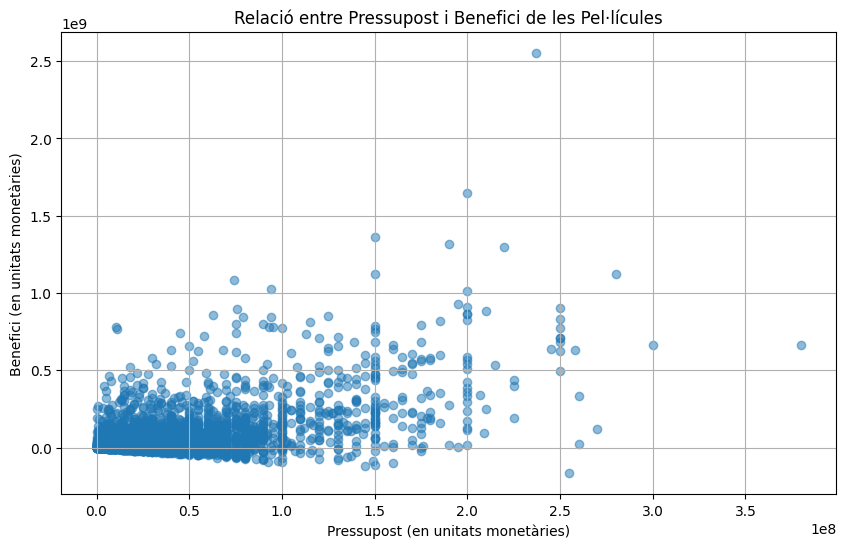

In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

with open('DATABASE/financials.p', 'rb') as file:
    financials_data = pickle.load(file)

with open('DATABASE/movies.p', 'rb') as file:
    movies_data = pickle.load(file)

financials_df = pd.DataFrame(financials_data)
movies_df = pd.DataFrame(movies_data)

merged_df = pd.merge(financials_df, movies_df, on='id')
merged_df['profit'] = merged_df['revenue'] - merged_df['budget']

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['budget'], merged_df['profit'], alpha=0.5)
plt.title('Relació entre Pressupost i Benefici de les Pel·lícules')
plt.xlabel('Pressupost (en unitats monetàries)')
plt.ylabel('Benefici (en unitats monetàries)')
plt.grid(True)

plt.show()
#Sí, la tendència indica que una major inversió sovint resulta en un increment dels beneficis.


En la mateixa gràfica anem incloure les valoracions de les pel·lìcules, aparentment imaginem que les pel·lìcules que han tingut bona acollida son les que mé beneficis han aportat. Veient la gràfica creada sembla certa aquesta afirmaciò?

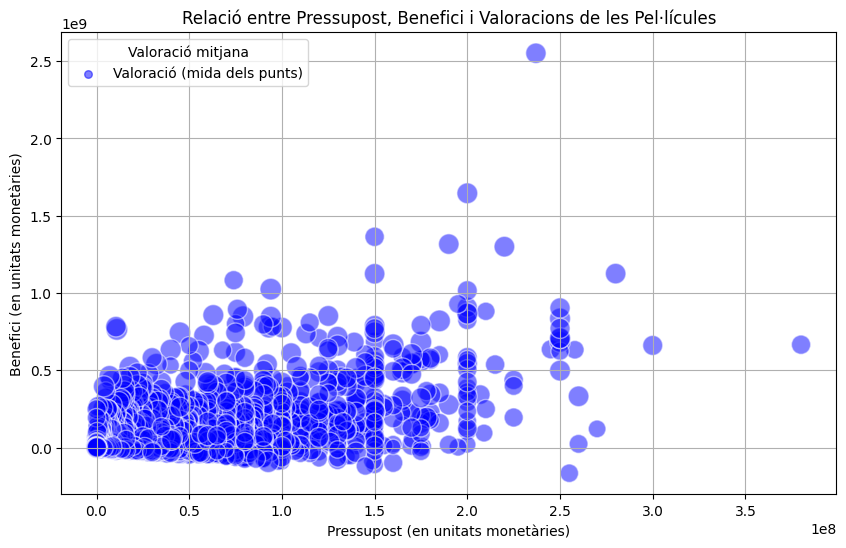

In [39]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

with open('DATABASE/financials.p', 'rb') as file:
    financials_data = pickle.load(file)

with open('DATABASE/ratings.p', 'rb') as file:
    ratings_data = pickle.load(file)

financials_df = pd.DataFrame(financials_data)
ratings_df = pd.DataFrame(ratings_data)

merged_df = pd.merge(financials_df, ratings_df, on='id')
merged_df['profit'] = merged_df['revenue'] - merged_df['budget']

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['budget'], merged_df['profit'], 
            s=merged_df['vote_average'] * 30,
            alpha=0.5, c='blue', edgecolors='w')

plt.title('Relació entre Pressupost, Benefici i Valoracions de les Pel·lícules')
plt.xlabel('Pressupost (en unitats monetàries)')
plt.ylabel('Benefici (en unitats monetàries)')
plt.grid(True)

plt.scatter([], [], s=30, c='blue', alpha=0.5, label='Valoració (mida dels punts)')
plt.legend(title='Valoració mitjana', loc='upper left')

plt.show()


Finalment per determinar quina tipus de pel·lìcula realitzarem visualitzarem els gèneres que ofereixen millor relació en quant a proporció de benefici. Mirant l'apartat anterior i aquest, quin seria els gèneres de la teva pel·lìcula? Fica imagina i proposa una temàtica.

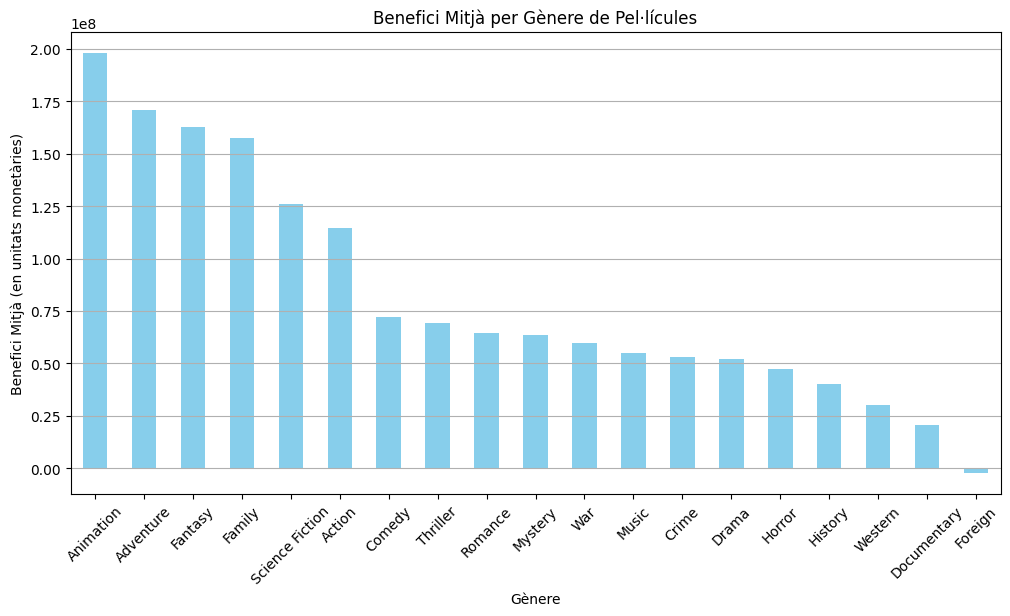

In [38]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

with open('DATABASE/financials.p', 'rb') as file:
    financials_data = pickle.load(file)

with open('DATABASE/movie_to_genres.p', 'rb') as file:
    genres_data = pickle.load(file)

financials_df = pd.DataFrame(financials_data)
genres_df = pd.DataFrame(genres_data)

financials_df['profit'] = financials_df['revenue'] - financials_df['budget']
merged_df = pd.merge(financials_df, genres_df, left_on='id', right_on='movie_id')
benefit_per_genre = merged_df.groupby('genre')['profit'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
benefit_per_genre.plot(kind='bar', color='skyblue')
plt.title('Benefici Mitjà per Gènere de Pel·lícules')
plt.xlabel('Gènere')
plt.ylabel('Benefici Mitjà (en unitats monetàries)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


## 'Segundas partes no son buenas'

La nostra pel·lìcula ha tingut molt bona acollida tant que estem valorant la possibilitat de realitzar una segona part. Existeix la idea de que les seqüeles son sempre pitjors. Mostra la diferència promig entre les pel·lìcules i les seves seqüeles i les 5 pel·lìcules on les seves continuacions han millorat mès.

In [37]:
import pickle
import pandas as pd

with open('DATABASE/sequels.p', 'rb') as file:
    sequels_df = pd.DataFrame(pickle.load(file)).dropna(subset=['sequel'])

movies_df = pd.DataFrame(pickle.load(open('DATABASE/movies.p', 'rb')))
ratings_df = pd.DataFrame(pickle.load(open('DATABASE/ratings.p', 'rb')))

final_df = sequels_df.merge(movies_df, left_on='id', right_on='id').merge(movies_df, left_on='sequel', right_on='id', suffixes=('', '_sequel'))
final_df = final_df.merge(ratings_df[['id', 'vote_average']], left_on='id', right_on='id').rename(columns={'vote_average': 'vote_average_original'})
final_df = final_df.merge(ratings_df[['id', 'vote_average']], left_on='sequel', right_on='id', suffixes=('', '_sequel')).rename(columns={'vote_average': 'vote_average_sequel'})

final_df['diferencia'] = final_df['vote_average_sequel'] - final_df['vote_average_original']
top_5_improved = final_df.nlargest(5, 'diferencia')[['title', 'sequel', 'diferencia']]

print(top_5_improved)


                                       title  sequel  diferencia
74                        Mad Max: Fury Road   76341         1.3
27       Captain America: The Winter Soldier  100402         1.0
82  Halloween 4: The Return of Michael Myers   11357         0.9
14                                   Skyfall   37724         0.8
28                            Jurassic World  135397         0.8


In [ ]:
# Mostra les 5 millor sequeles en comparació a la seva predecesora

In [33]:
import pandas as pd
import pickle

with open('DATABASE/sequels.p', 'rb') as file:
    sequels_data = pickle.load(file)
with open('DATABASE/ratings.p', 'rb') as file:
    ratings_data = pickle.load(file)
with open('DATABASE/movies.p', 'rb') as file:
    movies_data = pickle.load(file)

sequels_df = pd.DataFrame(sequels_data)
ratings_df = pd.DataFrame(ratings_data)
movies_df = pd.DataFrame(movies_data)

sequels_df = sequels_df.dropna(subset=['sequel'])
sequels_df = sequels_df.merge(movies_df[['id', 'title']], on='id', how='left')
sequels_df = sequels_df.rename(columns={'title': 'title_x'})
sequels_df = sequels_df.merge(movies_df[['id', 'title']], left_on='sequel', right_on='id', suffixes=('', '_sequel'))
sequels_df = sequels_df.rename(columns={'title': 'title_y'})

final_df = sequels_df[['id', 'title_x', 'sequel', 'title_y']]
final_df = final_df.merge(ratings_df[['id', 'vote_average']], left_on='id', right_on='id', how='left')
final_df = final_df.rename(columns={'vote_average': 'valoracion_original'})
final_df = final_df.merge(ratings_df[['id', 'vote_average']], left_on='sequel', right_on='id', how='left')
final_df = final_df.rename(columns={'vote_average': 'valoracion_sequel'})

final_df['diferencia_valoracion'] = final_df['valoracion_sequel'] - final_df['valoracion_original']
final_df['valoracion_original'] = final_df['valoracion_original'].round(1)
final_df['valoracion_sequel'] = final_df['valoracion_sequel'].round(1)
final_df['diferencia_valoracion'] = final_df['diferencia_valoracion'].round(1)

mejores_sequelas = final_df.sort_values(by='diferencia_valoracion', ascending=False).head(5)
mejores_sequelas = mejores_sequelas.rename(columns={
    'title_x': 'Título Original',
    'title_y': 'Título Secuela',
    'valoracion_original': 'Valoración Original',
    'valoracion_sequel': 'Valoración Secuela',
    'diferencia_valoracion': 'Diferencia en Valoración'
})

print(mejores_sequelas[['Título Original', 'Título Secuela', 'Valoración Original', 'Valoración Secuela', 'Diferencia en Valoración']].to_string(index=False))


                   Título Original                     Título Secuela                           Título Secuela  Valoración Original  Valoración Secuela  Diferencia en Valoración
        Mad Max Beyond Thunderdome         Mad Max Beyond Thunderdome                       Mad Max: Fury Road                  5.9                 7.2                       1.3
Captain America: The First Avenger Captain America: The First Avenger      Captain America: The Winter Soldier                  6.6                 7.6                       1.0
Halloween III: Season of the Witch Halloween III: Season of the Witch Halloween 4: The Return of Michael Myers                  5.0                 5.9                       0.9
                 Jurassic Park III                  Jurassic Park III                           Jurassic World                  5.7                 6.5                       0.8
                 Quantum of Solace                  Quantum of Solace                                  Skyfall



---



## UPGRADE - CASTING


A partir del dataset actors, fes l'anàlisis que consideris adient per escollir els nostres actors/actrius